# Assignment: Pandas Groupby with Hurricane Data

Import Numpy, Pandas and Matplotlib and set the display options.

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = (12,7)

Use the following code to load a CSV file of the [NOAA IBTrACS](https://www.ncdc.noaa.gov/ibtracs/index.php?name=ibtracs-data) hurricane dataset:

In [76]:
url = 'https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r01/access/csv/ibtracs.ALL.list.v04r01.csv'	

df = pd.read_csv(url, parse_dates=['ISO_TIME'], usecols=range(12),
                 skiprows=[1], na_values=[' ', 'NOT_NAMED'],
                 keep_default_na=False, dtype={'NAME': str})
df.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WMO_WIND,WMO_PRES
0,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 03:00:00,NR,10.9,80.3,NaN,NaN
1,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 06:00:00,NR,10.9,79.8,NaN,NaN
2,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 09:00:00,NR,10.8,79.4,NaN,NaN
3,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 12:00:00,NR,10.8,78.9,NaN,NaN
4,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 15:00:00,NR,10.8,78.4,NaN,NaN


Basin Key: (NI - North Indian, SI - South Indian, WP - Western Pacific, SP - Southern Pacific, EP - Eastern Pacific, NA - North Atlantic)

How many rows does this dataset have?

In [77]:
rows, columns = df.shape
print("This dataset has", rows, "rows.")

This dataset has 715369 rows.


How many North Atlantic hurricanes are in this dataset?

In [78]:
basin_count = df['BASIN'].value_counts()
print(basin_count)

print("There are 126395 North Atlantic basins")

BASIN
WP    239030
SI    160757
NA    126399
SP     67762
EP     64182
NI     57120
SA       119
Name: count, dtype: int64
There are 126395 North Atlantic basins


### 1) Get the unique values of the `BASIN`, `SUBBASIN`, and `NATURE` columns

In [79]:
basin_count = df['BASIN'].unique()

print(basin_count)

['NI' 'SI' 'NA' 'EP' 'WP' 'SP' 'SA']


In [80]:
subasin_count = df['SUBBASIN'].unique()
print(subasin_count)

['BB' 'AS' 'MM' 'GM' 'NA' 'CS' 'WA' 'EA' 'CP']


In [81]:
nature_count = df['NATURE'].unique()
print(nature_count)

['NR' 'TS' 'ET' 'MX' 'SS' 'DS']


### 2) Rename the `WMO_WIND` and `WMO_PRES` columns to `WIND` and `PRES`

In [82]:
df.rename(columns = {'WMO_WIND':'WIND'}, inplace = True)
df.rename(columns = {'WMO_PRES':'PRES'}, inplace = True)

df.head()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
0,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 03:00:00,NR,10.9,80.3,NaN,NaN
1,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 06:00:00,NR,10.9,79.8,NaN,NaN
2,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 09:00:00,NR,10.8,79.4,NaN,NaN
3,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 12:00:00,NR,10.8,78.9,NaN,NaN
4,1842298N11080,1842,1,NI,BB,UNNAMED,1842-10-25 15:00:00,NR,10.8,78.4,NaN,NaN


### 3) Get the 10 largest rows in the dataset by `WIND`

In [83]:
df.nlargest(10, 'WIND')

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,WIND,PRES
659500,2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-23 12:00:00,TS,17.3,-105.6,185.0,872.0
659498,2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-23 06:00:00,TS,16.5,-105.4,180.0,886.0
659502,2015293N13266,2015,96,EP,MM,PATRICIA,2015-10-23 18:00:00,TS,18.3,-105.3,180.0,878.0
421314,1980214N11330,1980,55,NA,GM,ALLEN,1980-08-07 18:00:00,TS,21.8,-86.4,165.0,899.0
175297,1935241N23291,1935,45,NA,NA,UNNAMED,1935-09-03 00:00:00,TS,24.6,-80.5,160.0,892.0
175298,1935241N23291,1935,45,NA,NA,UNNAMED,1935-09-03 02:00:00,TS,24.8,-80.8,160.0,892.0
175300,1935241N23291,1935,45,NA,GM,UNNAMED,1935-09-03 06:00:00,TS,25.1,-81.1,160.0,NaN
475876,1988253N12306,1988,73,NA,CS,GILBERT,1988-09-14 00:00:00,TS,19.7,-83.8,160.0,888.0
545771,1997253N12255,1997,75,EP,MM,LINDA,1997-09-12 06:00:00,TS,17.1,-109.6,160.0,902.0
599105,2005289N18282,2005,97,NA,CS,WILMA,2005-10-19 12:00:00,TS,17.3,-82.8,160.0,882.0


You will notice some names are repeated.

### 4) Group the data on `SID` and get the 10 largest hurricanes by `WIND`

In [129]:
large_hurricane = df.groupby('SID').max().nlargest(10, 'WIND')

large_hurricane

,SEASON,NUMBER,BASIN,SUBBASIN,NAME,NATURE,LAT,LON,WIND,PRES
SID,,,,,,,,,,
2015293N13266,2015,96,EP,MM,PATRICIA,TS,23.2,-94.0,185.0,1007.0
1980214N11330,1980,55,NA,NA,ALLEN,TS,28.9,-30.0,165.0,1010.0
1935241N23291,1935,45,NA,NA,UNNAMED,TS,57.0,-31.1,160.0,996.0
1988253N12306,1988,73,NA,NA,GILBERT,TS,43.4,-54.0,160.0,1008.0
1997253N12255,1997,75,EP,MM,LINDA,TS,23.5,-104.7,160.0,1007.0
2005289N18282,2005,97,NA,NA,WILMA,TS,45.5,-52.0,160.0,1004.0
2019236N10314,2019,53,NA,NA,DORIAN,TS,51.6,-46.4,160.0,1011.0
1998295N12284,1998,88,NA,NA,MITCH,TS,63.5,-5.0,155.0,1005.0
2005261N21290,2005,80,NA,NA,RITA,TS,39.5,-69.9,155.0,1009.0


### 5) Make a bar chart of the wind speed of the 20 strongest-wind hurricanes

Use the name on the x-axis.

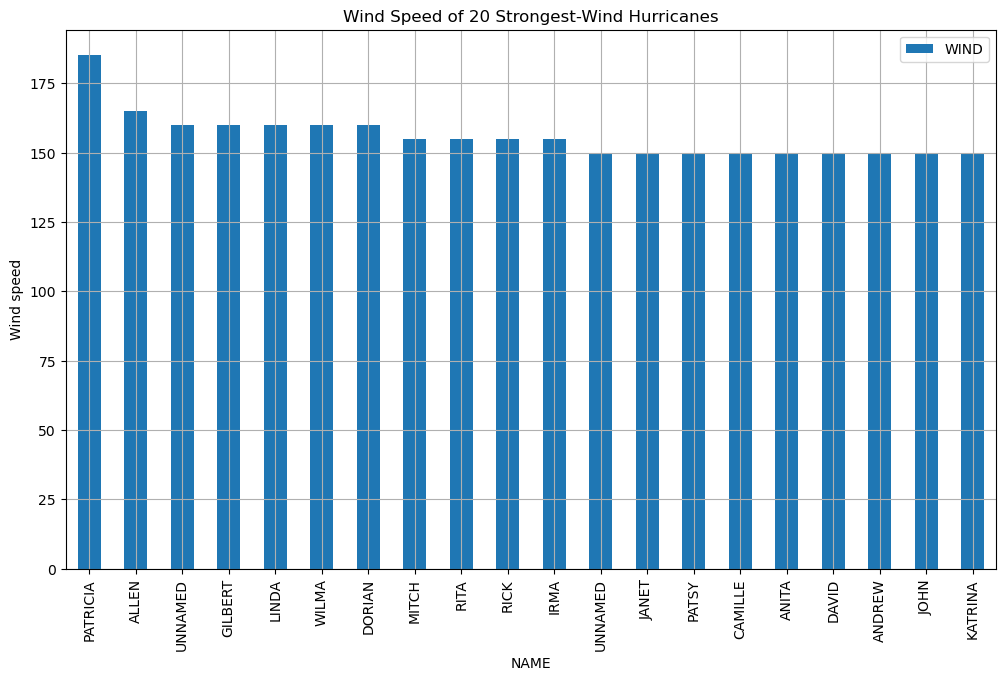

In [133]:
strongest_hurricanes_sort = df.groupby('SID').max().nlargest(20, 'WIND').plot(kind='bar', x = 'NAME', y ='WIND')
plt.ylabel("Wind speed")
plt.title("Wind Speed of 20 Strongest-Wind Hurricanes")
plt.grid(True)

### 6) Plot the count of all datapoints by Basin

as a bar chart

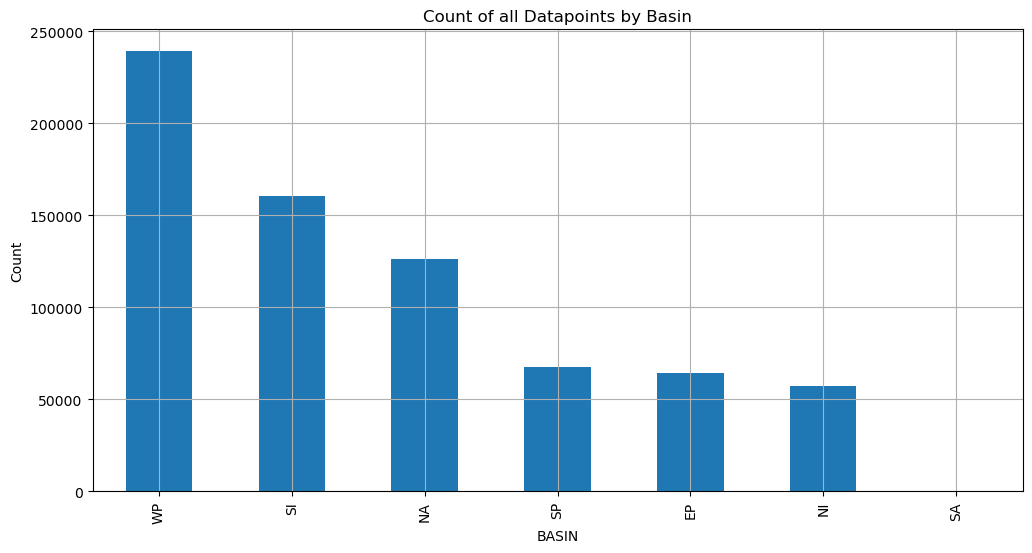

In [86]:
df['BASIN'].value_counts().plot(kind='bar', figsize=(12, 6))
plt.ylabel("Count")
plt.title("Count of all Datapoints by Basin")
plt.grid(True)

### 7) Plot the count of unique hurricanes by Basin

as a bar chart.

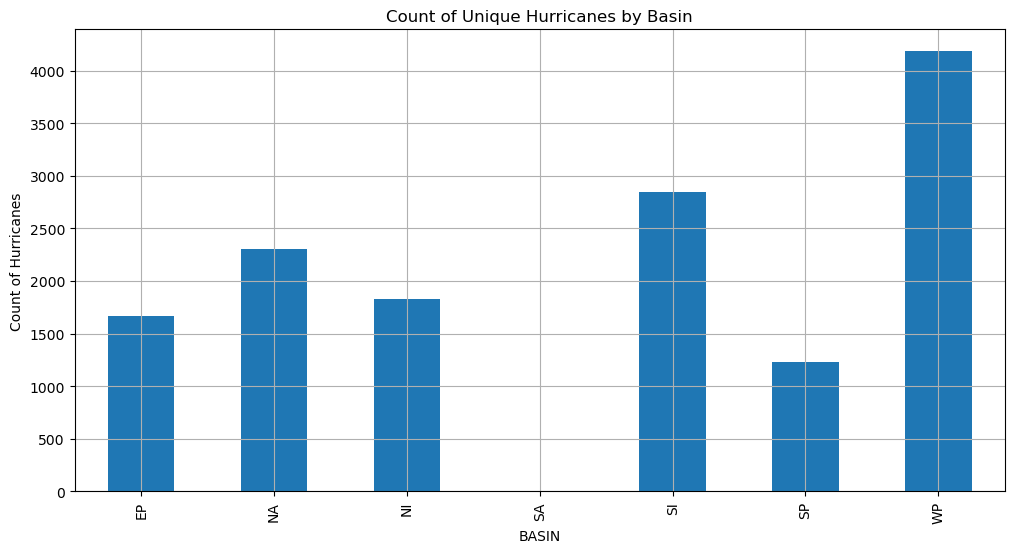

In [87]:
df.groupby('BASIN')['SID'].nunique().plot(kind='bar', figsize=(12,6))
plt.ylabel("Count of Hurricanes")
plt.title("Count of Unique Hurricanes by Basin")
plt.grid(True)

### 8) Make a `hexbin` of the location of datapoints in Latitude and Longitude

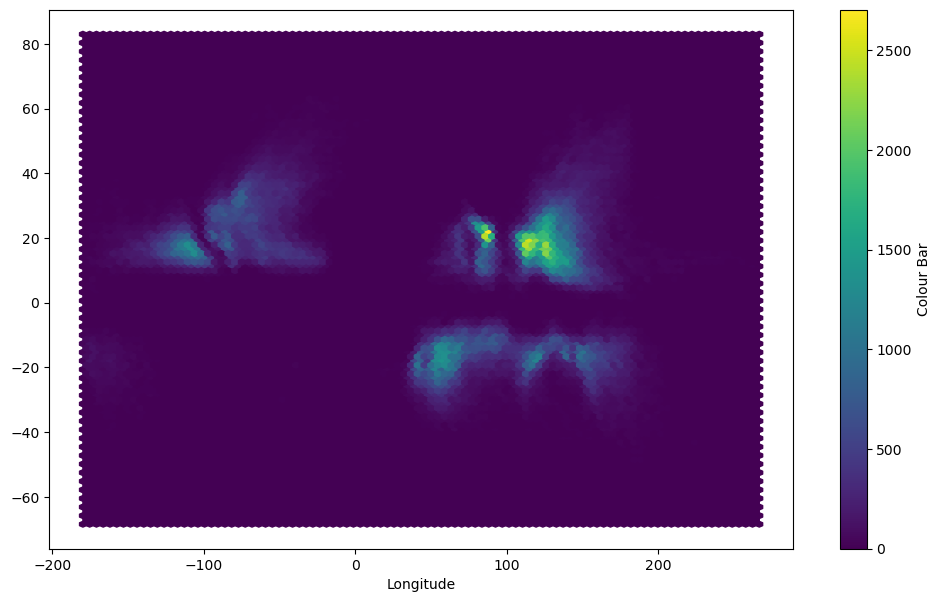

In [88]:
plot = plt.hexbin(df['LON'], df['LAT'])
plt.xlabel('Longitude')
cbar = plt.colorbar(plot)
cbar.set_label('Colour Bar')
plt.show() 

### 9) Find Hurricane Katrina (from 2005) and plot its track as a scatter plot

First find the SID of this hurricane.

In [89]:
hurricane_name = 'KATRINA'
hurricane_katrina = df[(df['NAME'] == hurricane_name) & (df['ISO_TIME'].dt.year == 2005)]
#hurricane_katrina.head()
print('The SID of Hurricane Katrina from 2005 is', hurricane_katrina['SID'].to_string(index=False), '.')

The SID of Hurricane Katrina from 2005 is 2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285
2005236N23285 .


Next get this hurricane's group and plot its position as a scatter plot. Use wind speed to color the points.

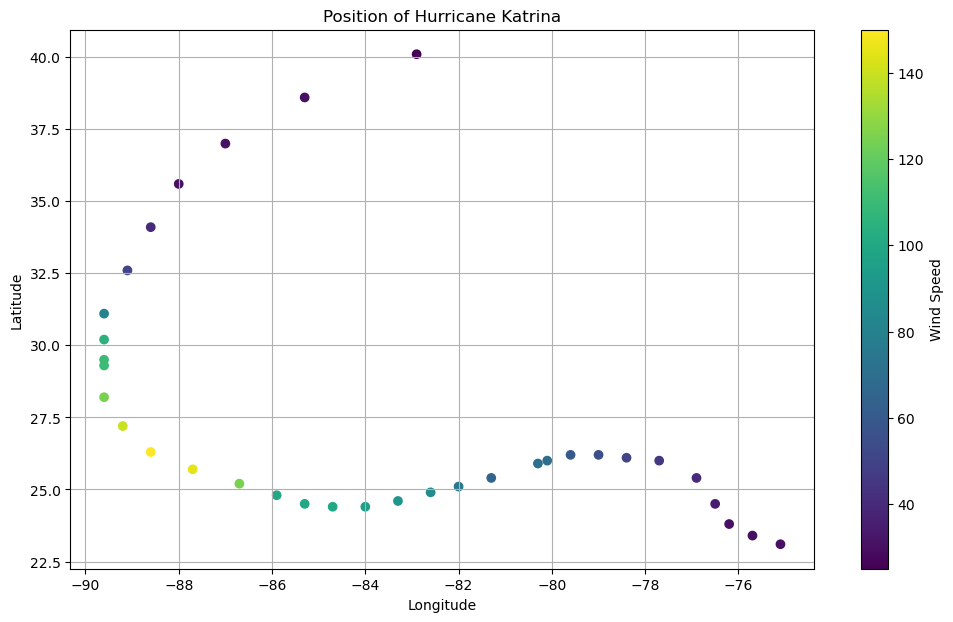

In [90]:
latitude = hurricane_katrina['LAT']
longitude = hurricane_katrina['LON']
wind_speed = hurricane_katrina['WIND']  

scatter = plt.scatter(longitude, latitude, c=wind_speed)
plt.colorbar(scatter, label='Wind Speed')  
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Position of Hurricane Katrina")
plt.grid(True)
plt.show()

### 10) Make time the index on your dataframe

In [91]:
df['ISO_TIME'] = pd.to_datetime(df['ISO_TIME'])
df.set_index('ISO_TIME', inplace = True)

### 11) Plot the count of all datapoints per year as a timeseries

You should use `resample`

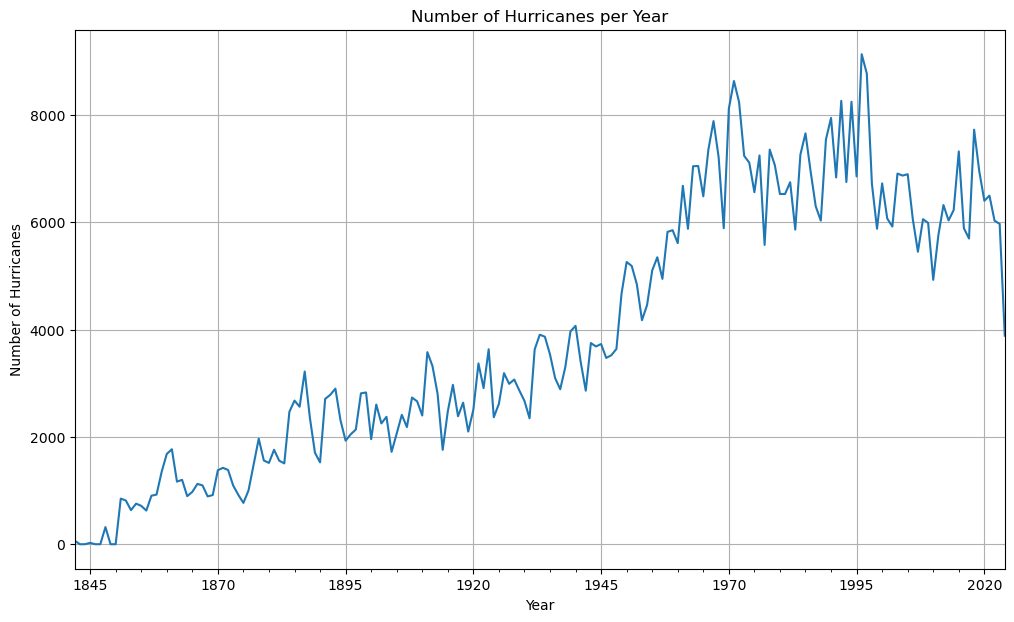

In [92]:
hurricane_counts = df.resample('YE')['SID'].count() 
hurricane_counts.plot()
plt.title('Number of Hurricanes per Year')
plt.xlabel('Year')
plt.ylabel('Number of Hurricanes')
plt.grid()
plt.show()

### 12) Plot all tracks from the North Atlantic in 2005

You will probably have to iterate through a `GroupBy` object

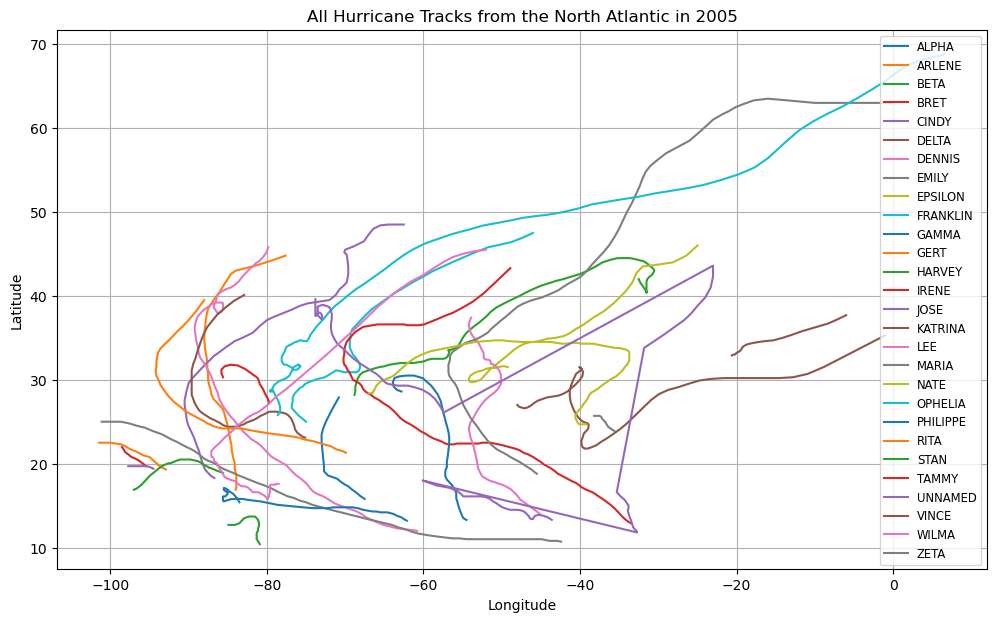

In [93]:
basin_name = 'NA'
North_Atlantic_2005 = df[(df['BASIN'] == basin_name) & (df.index.year == 2005)]

group_tracks = North_Atlantic_2005.groupby('NAME')

for sid, group in group_tracks:
    plt.plot(group['LON'], group['LAT'], label=sid)

plt.title("All Hurricane Tracks from the North Atlantic in 2005")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='upper right', fontsize='small')
plt.grid(True)
plt.show()

### 13) Create a filtered dataframe that contains only data since 1970 from the North Atlantic ("NA") Basin

Use this for the rest of the assignment

In [94]:
North_Atlantic_1970 = df[(df['BASIN'] == basin_name) & (df.index.year >= 1970)]

### 14) Plot the number of datapoints per day from this filtered dataframe

Make sure you figure is big enough to actually see the plot

(0.0, 40.0)

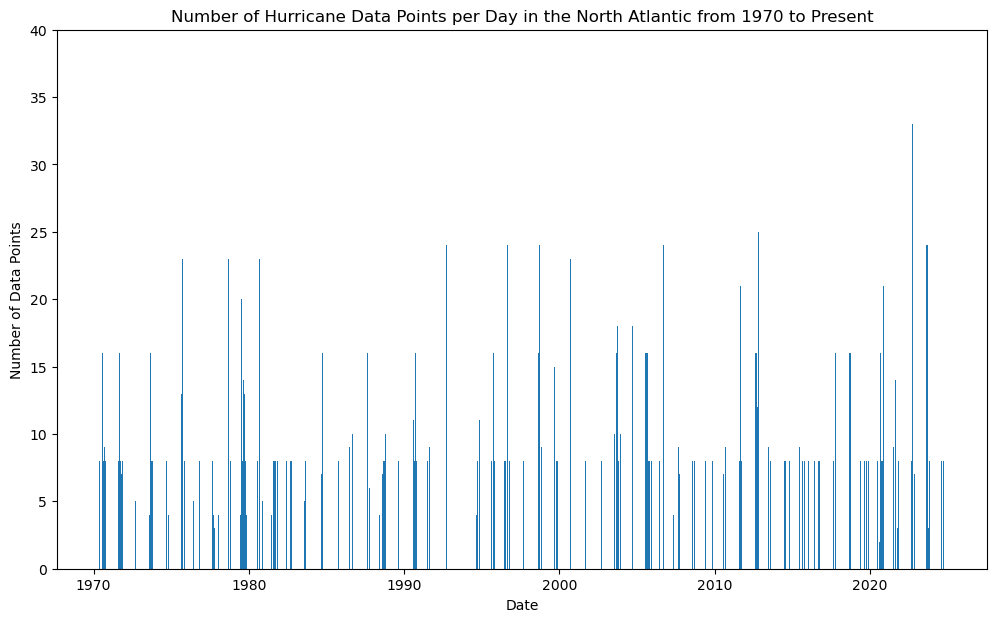

In [95]:
plt.plot(figsize=(12,5))
daily_data = North_Atlantic_1970.resample('D').count()
plt.bar(daily_data.index,daily_data['SEASON'])
plt.title('Number of Hurricanes Per Day in the North Atlantic from 1970 to Present')
plt.xlabel('Date')
plt.ylabel('Number of Data Points')
plt.ylim(0,40)

### 15) Calculate the climatology of datapoint counts as a function of `dayofyear`

Plot the mean and standard deviation on a single figure

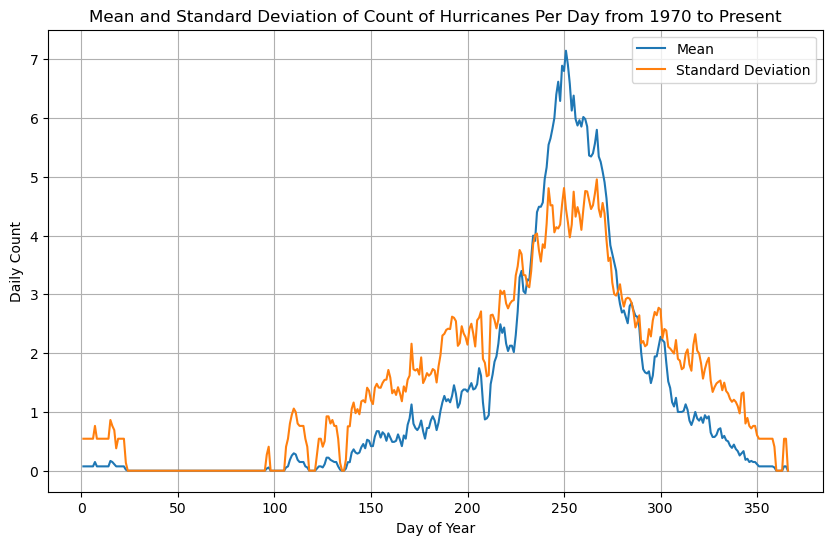

In [104]:
daily_data['Date'] = pd.to_datetime(daily_data.index).date
daily_data['Day'] = pd.to_datetime(daily_data['Date']).dt.dayofyear

daily_count = North_Atlantic_1970.resample('D').count()
daily_count['Date'] = pd.to_datetime(daily_count.index).date
daily_count['Daily Count'] = pd.to_datetime(daily_count['Date']).dt.dayofyear

mean_std = daily_count.groupby('Daily Count').agg({'WIND': ['mean', 'std']})

fig, ax1 = plt.subplots(1, 1, figsize=(10, 6), sharex=True)
ax1.plot(mean_std.index, mean_std['WIND']['mean'], label='Mean')
ax1.plot(mean_std.index, mean_std['WIND']['std'], label='Standard Deviation')  
ax1.legend()
ax1.set_xlabel("Day of Year")
ax1.set_ylabel("Daily Count")
ax1.set_title("Mean and Standard Deviation of Count of Hurricanes Per Day from 1970 to Present")
plt.grid(True)
plt.show()


### 16) Use `transform` to calculate the anomaly of daily counts from the climatology

Resample the anomaly timeseries at annual resolution and plot a line with dots as markers.

Which years stand out as having anomalous hurricane activity?

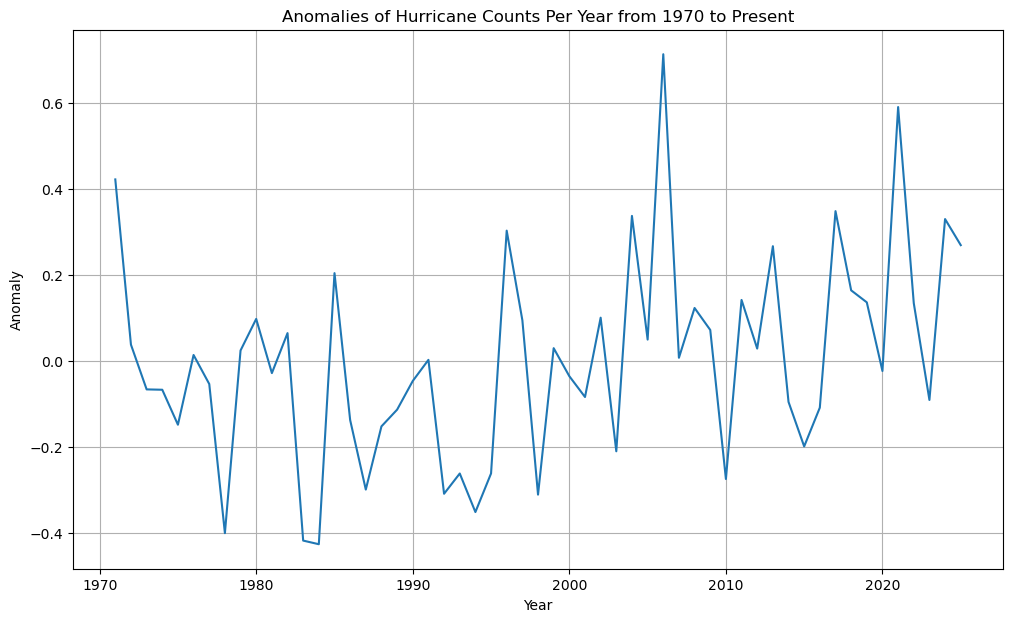

In [127]:
def standardize(x):
    return (x - x.mean())/x.std()
    
daily_anomaly = daily_data[['Day','SEASON']]
anomaly = daily_anomaly.groupby('Day').transform(standardize)
Annual_anomaly = anomaly.resample('YE').mean()

plt.plot(Annual_anomaly['SEASON'])
plt.ylabel("Anomaly")
plt.xlabel("Year")
plt.title("Anomalies of Hurricane Counts Per Year from 1970 to Present")
plt.grid(True)

In [126]:
max_anomaly = Annual_anomaly.index[Annual_anomaly['SEASON'] > 0.3].year
min_anomaly = Annual_anomaly.index[Annual_anomaly['SEASON'] < -0.3].year

print("Years with maximum anomalies (> 0.3):", max_anomaly.tolist()) #0.3 is my arbitrary threshold for hurricane anomalies
print("Years with minimum anomalies (< -0.3):", min_anomaly.tolist())

Years with maximum anomalies (> 0.3): [1970, 1995, 2003, 2005, 2016, 2020, 2023]
Years with minimum anomalies (< -0.3): [1977, 1982, 1983, 1991, 1993, 1997]
